In [1]:
from lir_proteome_screen_pssm import environment as env
from lir_proteome_screen_pssm import pssms
import pandas as pd
import numpy as np
import logomaker as lm
import matplotlib.pyplot as plt
plt.style.use('custom_standard')
plt.style.use('custom_small')
import seaborn as sns

from pathlib import Path

%load_ext autoreload
%autoreload 2

In [40]:
env.RAWFILEPATHS

FilePaths(ilir_table=PosixPath('/Users/jackson/MIT Dropbox/Jackson Halpin/work/11-lir_pssm_scoring/pssm_lc3b_lir-adjacent/data/raw/iLIR_27.csv'), screening_hits_table=PosixPath('/Users/jackson/MIT Dropbox/Jackson Halpin/work/11-lir_pssm_scoring/pssm_lc3b_lir-adjacent/data/raw/liradj_peptides_250411.csv'), lir_central_table=PosixPath('/Users/jackson/MIT Dropbox/Jackson Halpin/work/11-lir_pssm_scoring/pssm_lc3b_lir-adjacent/data/raw/LIRCentral_filtered_sequences_250508.csv'), full_screening_table=PosixPath('/Users/jackson/MIT Dropbox/Jackson Halpin/work/11-lir_pssm_scoring/pssm_lc3b_lir-adjacent/data/raw/231209_completedata_JK.csv'))

# screening

In [3]:
sc_lirs = pd.read_csv(env.RAWFILEPATHS.screening_hits_table)
sc_binders = sc_lirs[sc_lirs['Bind/Nonbind'] == 'Bind'].copy()
sc_nbs = sc_lirs[sc_lirs['Bind/Nonbind'] == 'Nonbind'].copy()

In [ ]:
sc_lirs

only unique binders

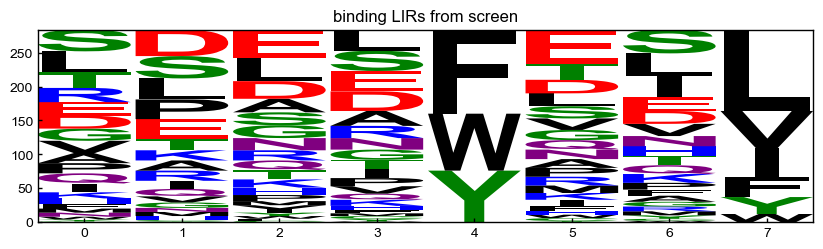

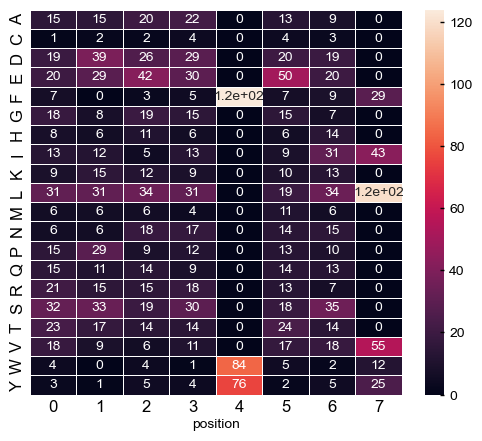

In [41]:
binders = sc_binders['first_8_residues'].to_list()
assert all([len(b) == 8 for b in binders]), "All binders should be 8 residues long"
c_binders = pssms.alignment_2_counts(list(set(binders)))
ax = pssms.plot_logo(c_binders);
ax.set_title('binding LIRs from screen');
f_binders = c_binders.div(c_binders.sum(axis=1), axis=0)
ax = pssms.plot_logo_as_heatmap(c_binders);
# ax = pssms.plot_logo_as_heatmap(f_binders);

binders with duplicates

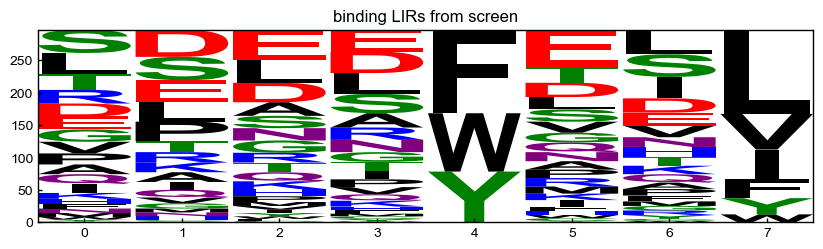

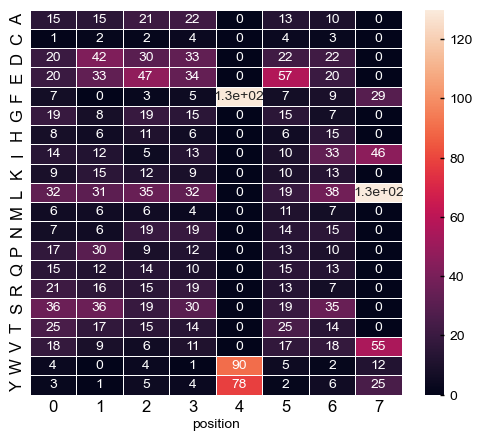

In [ ]:
binders = sc_binders['first_8_residues'].to_list()
assert all([len(b) == 8 for b in binders]), "All binders should be 8 residues long"
c_binders = pssms.alignment_2_counts(list(set(binders)))
ax = pssms.plot_logo(c_binders);
ax.set_title('binding LIRs from screen');
f_binders = c_binders.div(c_binders.sum(axis=1), axis=0)
ax = pssms.plot_logo_as_heatmap(c_binders);
# ax = pssms.plot_logo_as_heatmap(f_binders);

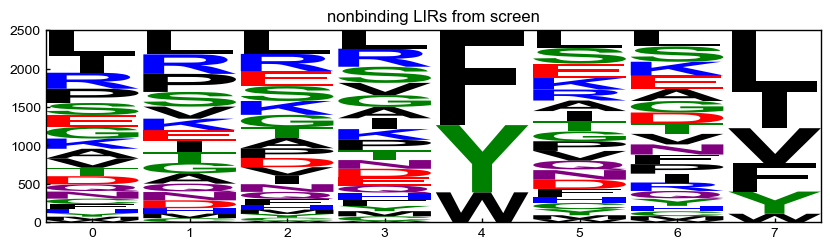

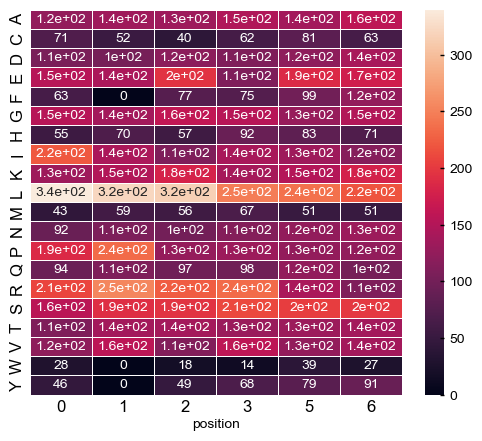

In [30]:
nonbinders = sc_nbs['first_8_residues'].to_list()
assert all([len(b) == 8 for b in nonbinders]), "All nonbinders should be 8 residues long"
c_nbs = pssms.alignment_2_counts(nonbinders)
ax = pssms.plot_logo(c_nbs)
ax.set_title('nonbinding LIRs from screen');
f_nbs = c_nbs.div(c_nbs.sum(axis=1), axis=0)
ax = pssms.plot_logo_as_heatmap(
    c_nbs.loc[[i for i in c_nbs.index if i != 4 and i!=7], :],
);

In [39]:
sc_nbs

ID  Position                    Hit  \
297   LKSQGGDGFYGRECDWWSVGVFLYEILVGDTPFYAD        44  sp|O75116|ROCK2_HUMAN   
298    HFLDVMAAGKRLMCGFFSPLFIHSCIHLFNAFYCV        30  sp|P98198|AT8B2_HUMAN   
299   ADGNWMGIVDPFARPRGHGRKGEDALCRYFSNERIP        33  sp|Q6P9H4|CNKR3_HUMAN   
300   TEGPRQEYSENNENYIEVPLIFDPVTREDLHMDFKC        43  sp|P27930|IL1R2_HUMAN   
301   AAGVDAGTPAPLRGVLCPLIWCLLLSLARGRQPLSR        49  sp|Q8IW93|ARHGJ_HUMAN   
...                                    ...       ...                    ...   
2798  YAVSRGFKDLELDTPSIEKRFAYSFLQQLIRYVDEA        35   sp|Q92736|RYR2_HUMAN   
2799  YDLCKTQIYTEEGKVWDYMACQPESTDMTKYLKVKL        59  sp|Q9Y2I2|NTNG1_HUMAN   
2800  YEEPQAPPPVTSVITTEVDMRYYNYLLNPIREEFIS        50  sp|Q6Q759|SPG17_HUMAN   
2801  YLAVQLSPAIPVFAAMLFLFSMATLLRTSFSDPGVI        29  sp|Q9Y397|ZDHC9_HUMAN   
2802  YLTQKTFVVLNRGKTLFRFSATPALYILSPFNLIRR        35  sp|Q9UQD0|SCN8A_HUMAN   

      Length  Input Count  ER 0      ER 1      ER 3   4   5  ...  \
297       36         2171   0.0 -6.508351 -8.289520 NaN NaN  ...   
298       35          117   0.0 -2.410049 -2.490778 NaN NaN  ...   
299       36          905   0.0 -0.693755 -1.397793 NaN NaN  ...   
300       36          839   0.0 -0.065684 -1.123487 NaN NaN  ...   
301       36          384   0.0 -0.778872 -3.790339 NaN NaN  ...   
...      ...          ...   ...       ...       ...  ..  ..  ...   
2798      36          269   0.0 -1.218829 -5.276838 NaN NaN  ...   
2799      36          113   0.0 -3.622898 -5.025555 NaN NaN  ...   
2800      36          410   0.0 -4.634202 -6.884856 NaN NaN  ...   
2801      36          141   0.0 -3.094273 -4.344927 NaN NaN  ...   
2802      36          337   0.0 -2.433789 -2.901541 NaN NaN  ...   

      first_14_residues                    24_mer        12_mer  \
297      GDGFYGRECDWWSV  GDGFYGRECDWWSVGVFLYEILVG  RECDWWSVGVFL   
298      GGGSGIPLRHFLDV  GGGSGIPLRHFLDVMAAGKRLMCG  PLRHFLDVMAAG   
299      SGIPLRADGNWMGI  SGIPLRADGNWMGIVDPFARPRGH  ADGNWMGIVDPF   
300      RQEYSENNENYIEV  RQEYSENNENYIEVPLIFDPVTRE  NNENYIEVPLIF   
301      PLRGVLCPLIWCLL  PLRGVLCPLIWCLLLSLARGRQPL  CPLIWCLLLSLA   
...                 ...                       ...           ...   
2798     IPLRYAVSRGFKDL  IPLRYAVSRGFKDLELDTPSIEKR  VSRGFKDLELDT   
2799     CQPESTDMTKYLKV  CQPESTDMTKYLKVKLRIARGSGS  DMTKYLKVKLRI   
2800     SVITTEVDMRYYNY  SVITTEVDMRYYNYLLNPIREEFI  VDMRYYNYLLNP   
2801     SGGGSGIPLRYLAV  SGGGSGIPLRYLAVQLSPAIPVFA  IPLRYLAVQLSP   
2802     IPLRYLTQKTFVVL  IPLRYLTQKTFVVLNRGKTLFRFS  TQKTFVVLNRGK   

      sequence_length nonLIR_6  nonLIR_8 nonLIR_7 nonLIR_5 first_7_residues  \
297                24   LKSQGG  LKSQGGDG  KSQGGDG    KSQGG          ECDWWSV   
298                24   HFLDVM  HFLDVMAA  FLDVMAA    FLDVM          LRHFLDV   
299                24   ADGNWM  ADGNWMGI  DGNWMGI    DGNWM          DGNWMGI   
300                24   TEGPRQ  TEGPRQEY  EGPRQEY    EGPRQ          NENYIEV   
301                24   AAGVDA  AAGVDAGT  AGVDAGT    AGVDA          PLIWCLL   
...               ...      ...       ...      ...      ...              ...   
2798               24   YAVSRG  YAVSRGFK  AVSRGFK    AVSRG          SRGFKDL   
2799               24   YDLCKT  YDLCKTQI  DLCKTQI    DLCKT          MTKYLKV   
2800               24   YEEPQA  YEEPQAPP  EEPQAPP    EEPQA          DMRYYNY   
2801               24   YLAVQL  YLAVQLSP  LAVQLSP    LAVQL          PLRYLAV   
2802               24   YLTQKT  YLTQKTFV  LTQKTFV    LTQKT          QKTFVVL   

     first_5_residues  
297             DWWSV  
298             HFLDV  
299             NWMGI  
300             NYIEV  
301             IWCLL  
...               ...  
2798            GFKDL  
2799            KYLKV  
2800            RYYNY  
2801            RYLAV  
2802            TFVVL  

[2506 rows x 29 columns]

In [ ]:
undefined_positions = c_nbs.loc[[i for i in c_nbs.index if i != 4 and i!=7], :].copy()
(undefined_positions.sum()/undefined_positions.sum().sum())

A    0.055733
C    0.024541
D    0.046621
E    0.064046
F    0.029197
G    0.058792
H    0.028465
I    0.057396
K    0.061918
L    0.111998
M    0.021748
N    0.044493
P    0.061852
Q    0.041567
R    0.078079
S    0.076683
T    0.052275
V    0.054070
W    0.008380
Y    0.022147
dtype: float64

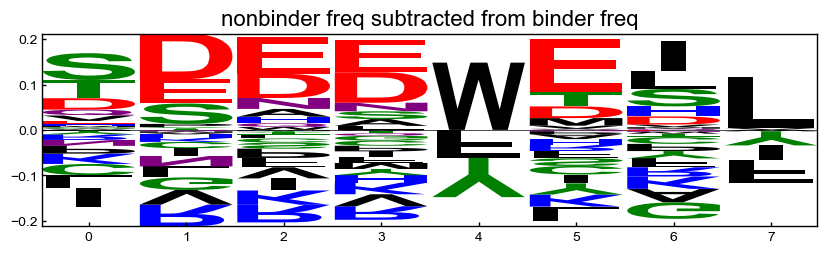

In [6]:
pssms.plot_logo(f_binders - f_nbs, title='nonbinder freq subtracted from binder freq');

In [ ]:
def freq_2_weight_matrix(fg, bg=None):
    """
    Calculate the weight matrix for a given foreground and background frequency matrix.
    The weight matrix is calculated as log2(fg / bg) for each position in the matrix.
    if no bg is provided, it will be set to a flat distribution.
    zero values in fg or bg will be SET TO 0 in the weight matrix. this should mean that 
    pseudocounts are not needed?
    """
    if isinstance(bg, dict):
        assert set(bg.keys()) == set(fg.columns), "Background dictionary keys must match foreground columns"
        bg = pd.DataFrame(bg, index=fg.index)
    elif bg is None:
        bg = pd.DataFrame(1, index=fg.index, columns=fg.columns)
        bg = bg.div(bg.sum(axis=1), axis=0)
    assert isinstance(bg, pd.DataFrame), "Background must be a DataFrame, dictionary, or None"
    assert (fg.columns == bg.columns).all(), "Foreground and background matrices must have the same columns"
    assert (fg.index == bg.index).all(), "Foreground and background matrices must have the same index"
    weight_matrix = fg.copy()
    for col in fg.columns:
        for ind in fg.index:
            # Calculate the weight using log2(fg / bg)
            if fg.loc[ind, col] == 0 or bg.loc[ind, col] == 0:
                weight_matrix.loc[ind, col] = 0
            else:
                weight_matrix.loc[ind, col] = np.log2(fg.loc[ind, col] / bg.loc[ind, col])
    return weight_matrix


def freq_2_information_matix(fg, bg=None):
    """
    Calculate the information matrix for a given foreground and background frequency matrix.
    The information matrix is calculated as fg * sum(fg*log2(fg/bg)) for each position in the matrix.
    if no bg is provided, it will be set to a flat distribution.
    """
    information_matrix = fg.copy()
    weight_matrix = freq_2_weight_matrix(fg, bg)
    col_information = []
    for ind in fg.index:
        i_i = 0
        for col in fg.columns:
            i_i+=fg.loc[ind, col] * weight_matrix.loc[ind, col]
        for col in fg.columns:
            information_matrix.loc[ind, col] = fg.loc[ind, col] * i_i
        col_information.append(i_i)
    return information_matrix, col_information


# df = f_binders.copy()
# for col in f_binders.columns:
#     for ind in f_binders.index:
#         if f_nbs.loc[ind, col] == 0:
#             df.loc[ind, col] = 0
#         else:
#             df.loc[ind, col] = np.log2(f_binders.loc[ind, col] / f_nbs.loc[ind, col])
# df2=freq_2_weight_matrix(f_binders, f_nbs)

In [8]:
c_binders_2_5 = pssms.alignment_2_counts(sc_binders[sc_binders['avg_z_score']>=2.5]['first_8_residues'].to_list())
f_binders_2_5 = c_binders_2_5.div(c_binders_2_5.sum(axis=1), axis=0)

### messing around with some weight matrices

[0.2934415624977918, 0.5440998072532278, 0.3879923468078577, 0.3504627281725344, 2.770829404021027, 0.3287429484784485, 0.30937323942547523, 2.1175882788943388]
[0.135008461878018, 0.22553451093882143, 0.182681892675969, 0.18232226832410114, 0.10247342637893293, 0.19366982429555626, 0.16298760114937486, 0.05107739277467133]
7.102530315550701
1.235755378415445


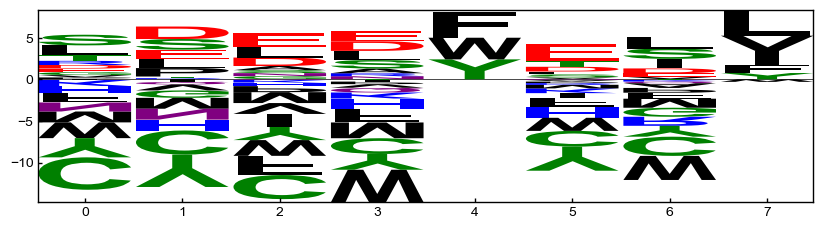

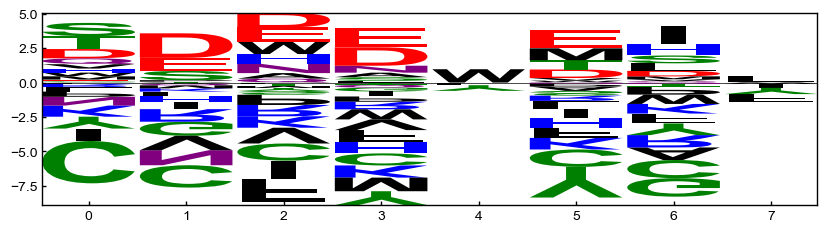

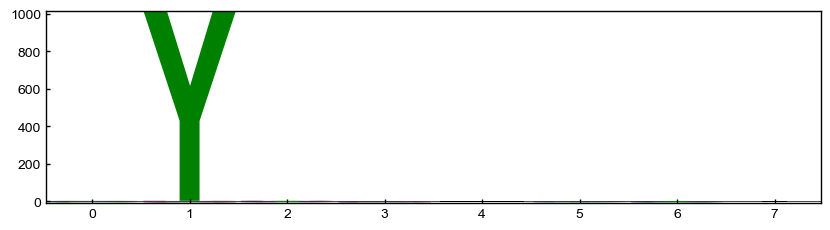

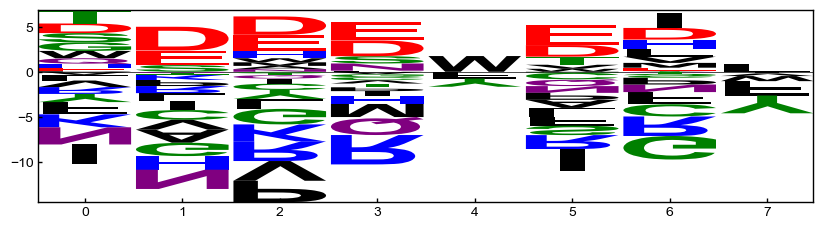

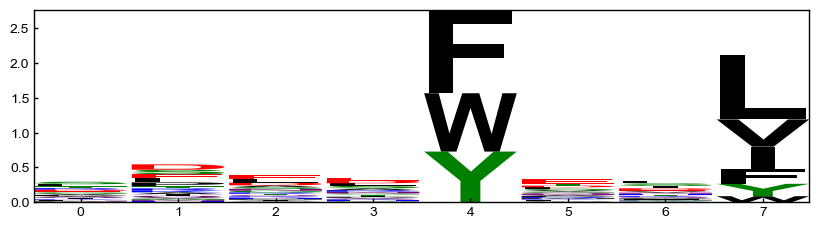

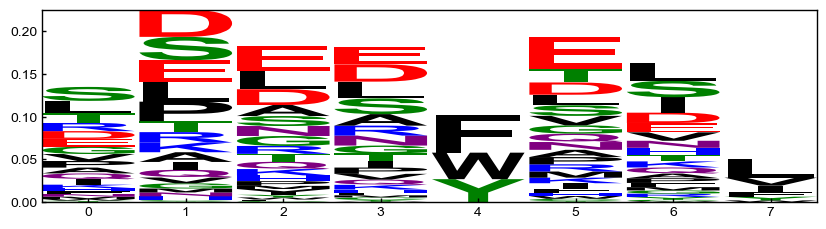

In [ ]:
pssms.plot_logo(freq_2_weight_matrix(f_binders)) # no pseudocounts, flat bg
pssms.plot_logo(freq_2_weight_matrix(f_binders, f_nbs)) # no pseudocounts, nonbinder bg
pssms.plot_logo(lm.transform_matrix(f_binders, from_type='probability', to_type='weight', pseudocount=1, background=f_nbs)) # pseudocounts, nonbinder bg
pssms.plot_logo(freq_2_weight_matrix(f_binders_2_5, f_nbs)) # no pseudocounts, nonbinder bg, avg z score > 2.5
df3, col_info3 = freq_2_information_matix(f_binders)
pssms.plot_logo(df3) # no pseudocounts, flat bg, information matrix
df4, col_info4 = freq_2_information_matix(f_binders, f_nbs)
pssms.plot_logo(df4) # no pseudocounts, nonbinder bg, information matrix
print(col_info3)
print(col_info4)
print(np.sum(col_info3))
print(np.sum(col_info4))
# pssms.plot_logo(freq_2_weight_matrix(f_binders, f_nbs)

<Axes: xlabel='position'>

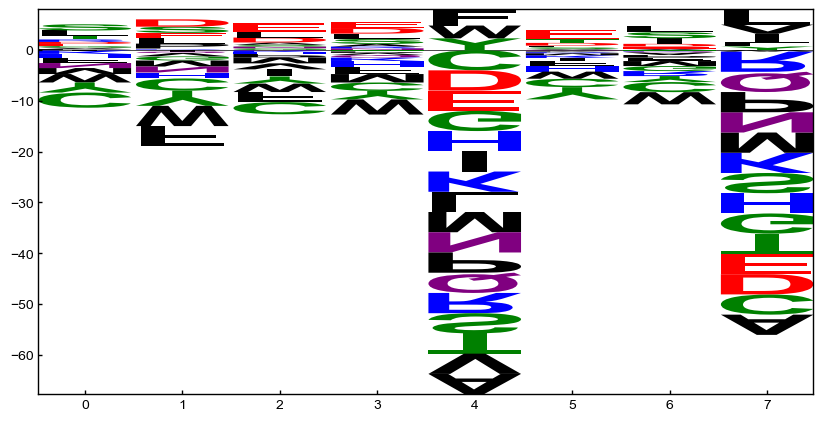

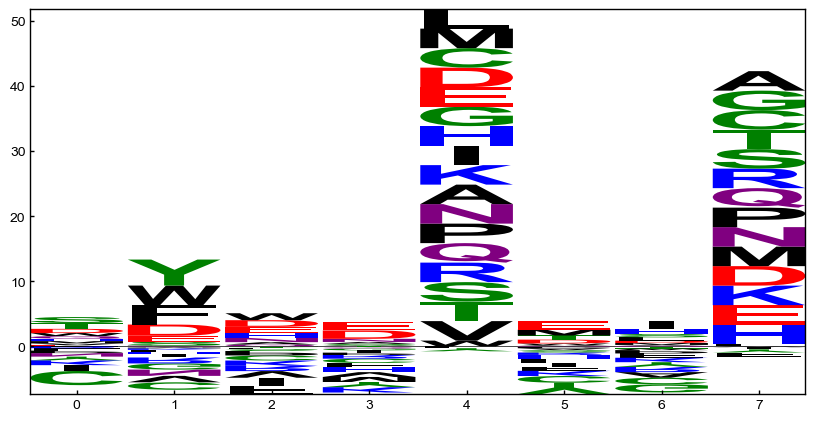

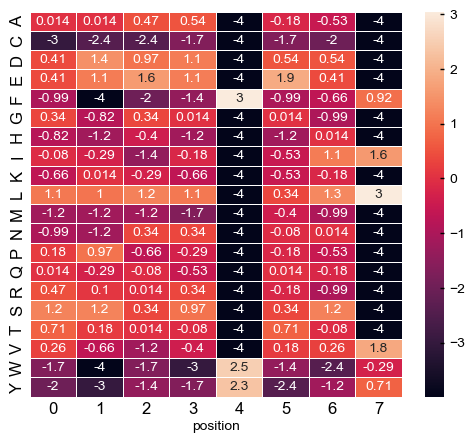

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
pssms.plot_logo(lm.alignment_to_matrix(binders, to_type='weight', pseudocount=1), ax = ax)
pssms.plot_logo_as_heatmap(lm.alignment_to_matrix(binders, to_type='weight', pseudocount=1))
fig, ax = plt.subplots(figsize=(10, 5))
bg_temp = lm.alignment_to_matrix(nonbinders, to_type='probability', pseudocount=1)
pssms.plot_logo(lm.alignment_to_matrix(binders, to_type='weight', pseudocount=1, background=bg_temp), ax = ax)

#### A lot of these fancy matrices don't actually give results that make any sense. The use of pseudocounts and background normalization leads to extremely confusing effects and I suspected the matrices will be very misleading.

### plot z-score cutoff vs information content

In [10]:
sc_binders

ID  Position  Hit  Length  Input Count  \
0               DIDNFDIDDFDDDDDWEDICII        44  NaN      22          976   
1                LWQPHSSKQDDMWEHIAISML        41  NaN      21          244   
2                 VIEEADLDGDGSWALLTSRT        41  NaN      20           10   
3                 QIPENSTSSQADDEWCYVLI        43  NaN      20           91   
4          LHNPESGEEAVALLEELQRDLGWDILA        51  NaN      27           13   
..                                 ...       ...  ...     ...          ...   
292  MPNTSVVLDTDAEFVILLLFLLLLFFFFRASFA        48  NaN      33          407   
293  MPNTSVVLDTDAEFVILLLFLLLLFFFFRASFA        53  NaN      33          407   
294      HLAAGYNNLEVAEYLLEHGADVNAQTRVV        34  NaN      29           29   
295  RVVNGAFMVLKGHRSIVNQARFNPHTYMICSLV        35  NaN      33           11   
296              MSQAVQQRYSTIKQNMGTQFI        37  NaN      21           48   

     ER 0  ER 1  ER 3          4          5  ...  first_14_residues  \
0     NaN   NaN   NaN  12.105609  13.229315  ...     DIDDFDDDDDWEDI   
1     NaN   NaN   NaN  12.104137  12.854852  ...     QPHSSKQDDMWEHI   
2     NaN   NaN   NaN  11.960512  12.786388  ...     EEADLDGDGSWALL   
3     NaN   NaN   NaN  11.838327  12.629829  ...     NSTSSQADDEWCYV   
4     NaN   NaN   NaN  12.020974  12.594453  ...     LLEELQRDLGWDIL   
..    ...   ...   ...        ...        ...  ...                ...   
292   NaN   NaN   NaN   8.140802   7.387363  ...     TDAEFVILLLFLLL   
293   NaN   NaN   NaN   8.140802   7.387363  ...     VILLLFLLLLFFFF   
294   NaN   NaN   NaN   7.296732   7.828102  ...     GIPLRHLAAGYNNL   
295   NaN   NaN   NaN   7.307211   7.830723  ...     IPLRRVVNGAFMVL   
296   NaN   NaN   NaN   7.790198   7.932998  ...     LRMSQAVQQRYSTI   

                       24_mer        12_mer  sequence_length nonLIR_6  \
0    DIDDFDDDDDWEDICII-------  DDDDWEDICII-               24   DDWEDI   
1    QPHSSKQDDMWEHIAISML-----  QDDMWEHIAISM               24   DMWEHI   
2    EEADLDGDGSWALLTSRT------  GDGSWALLTSRT               24   GSWALL   
3    NSTSSQADDEWCYVLI--------  ADDEWCYVLI--               24   DEWCYV   
4    LLEELQRDLGWDILA---------  RDLGWDILA---               24   LGWDIL   
..                        ...           ...              ...      ...   
292  TDAEFVILLLFLLLLFFFFRASFA  ILLLFLLLLFFF               24   LLFLLL   
293  VILLLFLLLLFFFFRASFA-----  LLLLFFFFRASF               24   LLFFFF   
294  GIPLRHLAAGYNNLEVAEYLLEHG  LAAGYNNLEVAE               24   AGYNNL   
295  IPLRRVVNGAFMVLKGHRSIVNQA  VNGAFMVLKGHR               24   GAFMVL   
296  LRMSQAVQQRYSTIKQNMGTQFI-  VQQRYSTIKQNM               24   QRYSTI   

     nonLIR_8 nonLIR_7 nonLIR_5 first_7_residues first_5_residues  
0    DDDDWEDI  DDDWEDI    DWEDI          DDDWEDI            DWEDI  
1    QDDMWEHI  DDMWEHI    MWEHI          DDMWEHI            MWEHI  
2    GDGSWALL  DGSWALL    SWALL          DGSWALL            SWALL  
3    ADDEWCYV  DDEWCYV    EWCYV          DDEWCYV            EWCYV  
4    RDLGWDIL  DLGWDIL    GWDIL          DLGWDIL            GWDIL  
..        ...      ...      ...              ...              ...  
292  ILLLFLLL  LLLFLLL    LFLLL          LLLFLLL            LFLLL  
293  LLLLFFFF  LLLFFFF    LFFFF          LLLFFFF            LFFFF  
294  LAAGYNNL  AAGYNNL    GYNNL          AAGYNNL            GYNNL  
295  VNGAFMVL  NGAFMVL    AFMVL          NGAFMVL            AFMVL  
296  VQQRYSTI  QQRYSTI    RYSTI          QQRYSTI            RYSTI  

[297 rows x 29 columns]

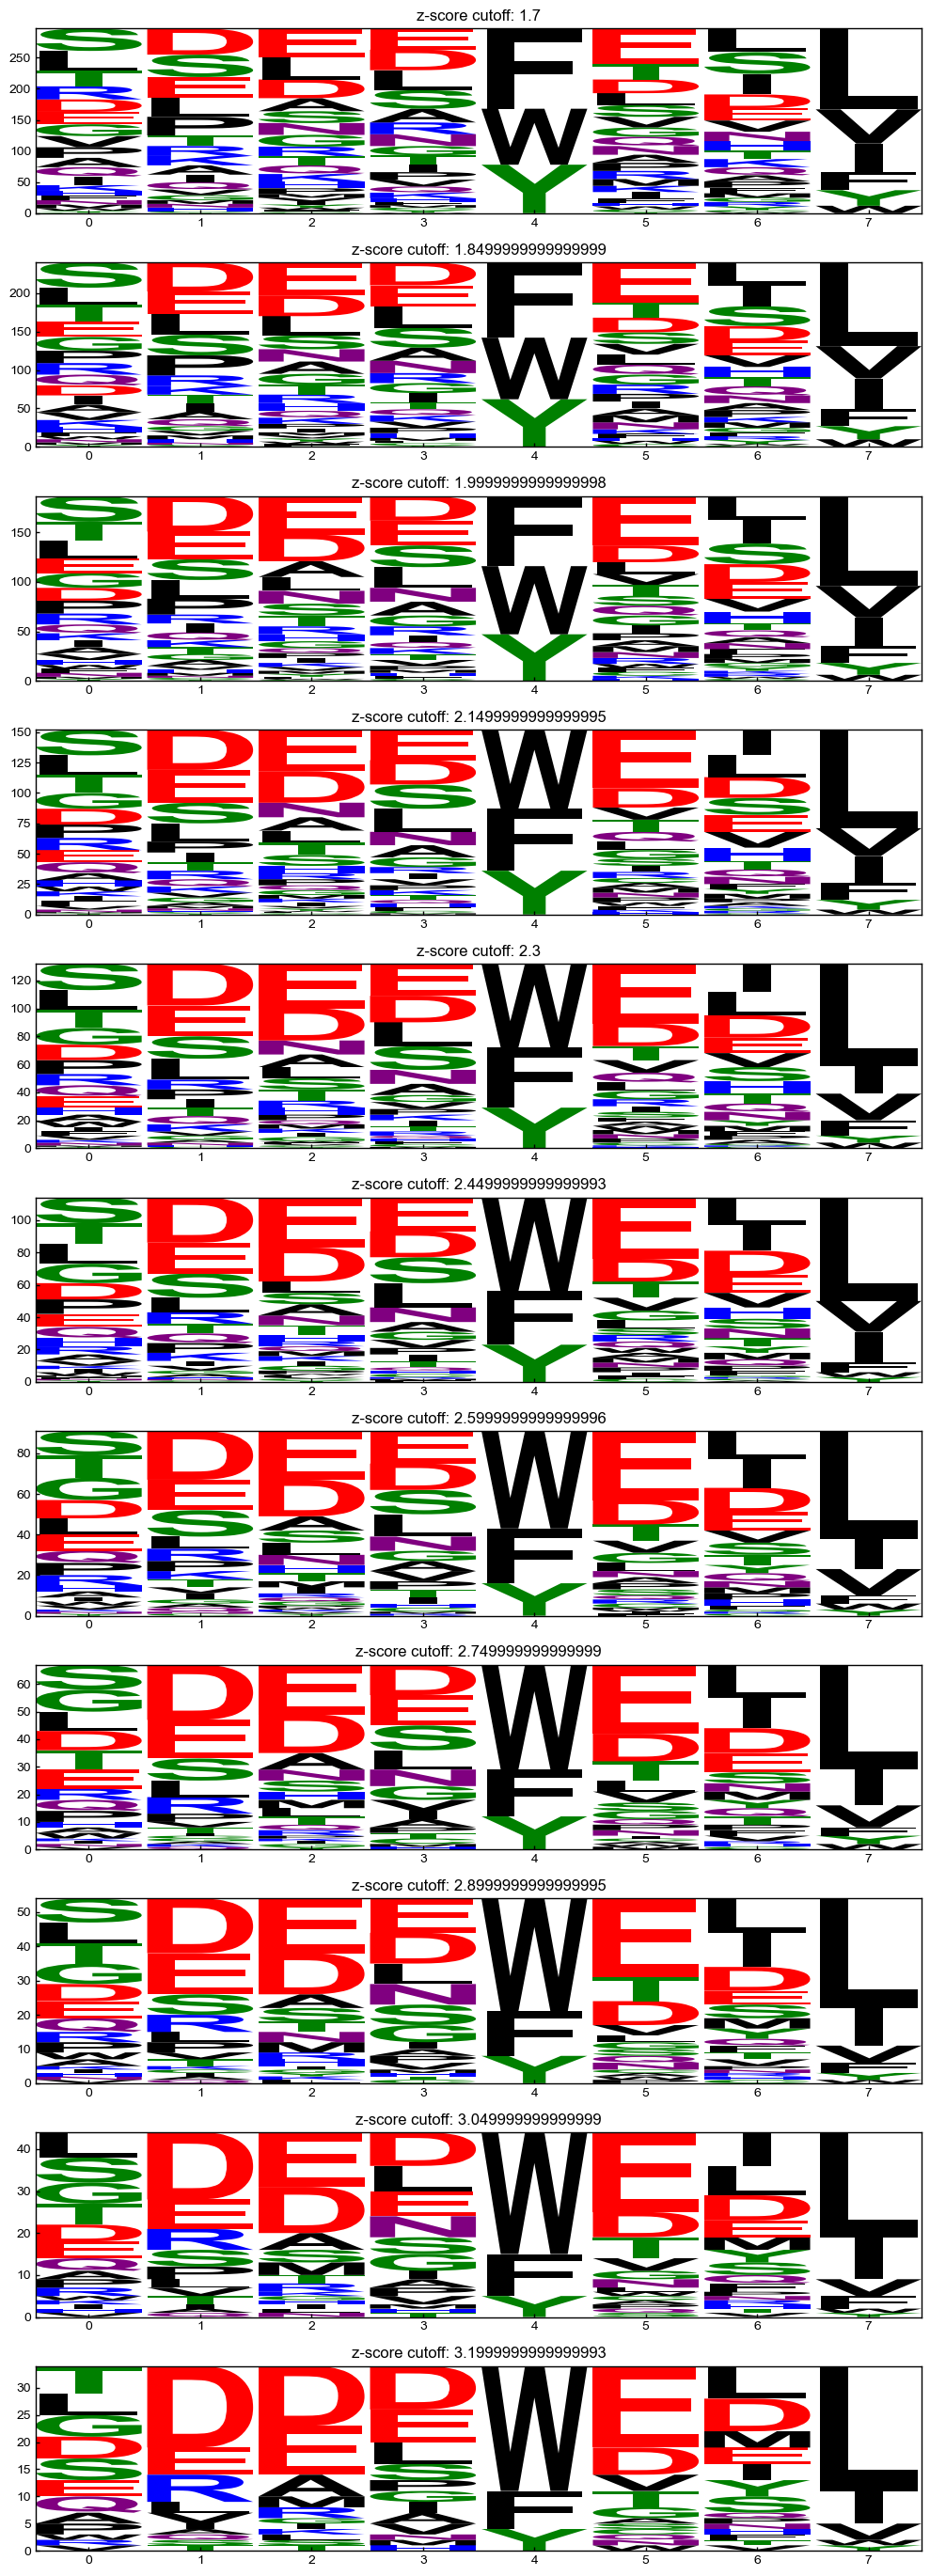

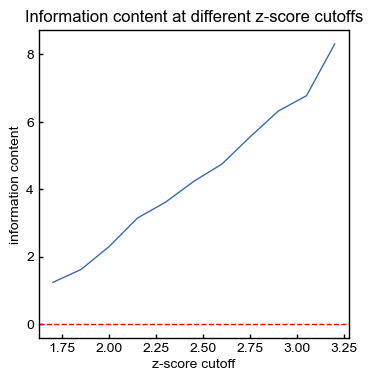

In [11]:
def information_at_z_score_cutoff(binder_df = sc_binders, background = f_nbs, z_score_cutoff=1.7, ax = None):
    binders = binder_df[binder_df['avg_z_score']>=z_score_cutoff]['first_8_residues'].to_list()
    c_binders = pssms.alignment_2_counts(binders)
    f_binders = c_binders.div(c_binders.sum(axis=1), axis=0)
    info_matrix, col_info = freq_2_information_matix(f_binders, bg=background)
    if ax is not None:
        pssms.plot_logo(c_binders, ax = ax)
        ax.set_title(f'z-score cutoff: {z_score_cutoff}');
    return np.sum(col_info), ax


cutoffs = np.arange(1.7, 3.2, 0.15)
# plot each cutoff on a subplot
n_plots = len(cutoffs)
information = []
fig, axs = plt.subplots(n_plots, 1, figsize=(10, 2.5*n_plots))
for axis, cutoff in zip(axs, cutoffs):
    I, _ = information_at_z_score_cutoff(sc_binders, f_nbs, z_score_cutoff=cutoff, ax=axis)
    information.append(I)
plt.tight_layout()
fig, ax = plt.subplots()
ax.plot(cutoffs, information)
ax.set_xlabel('z-score cutoff')
ax.set_ylabel('information content')
ax.set_title('Information content at different z-score cutoffs')
ax.axhline(y=0, color='r', linestyle='--')

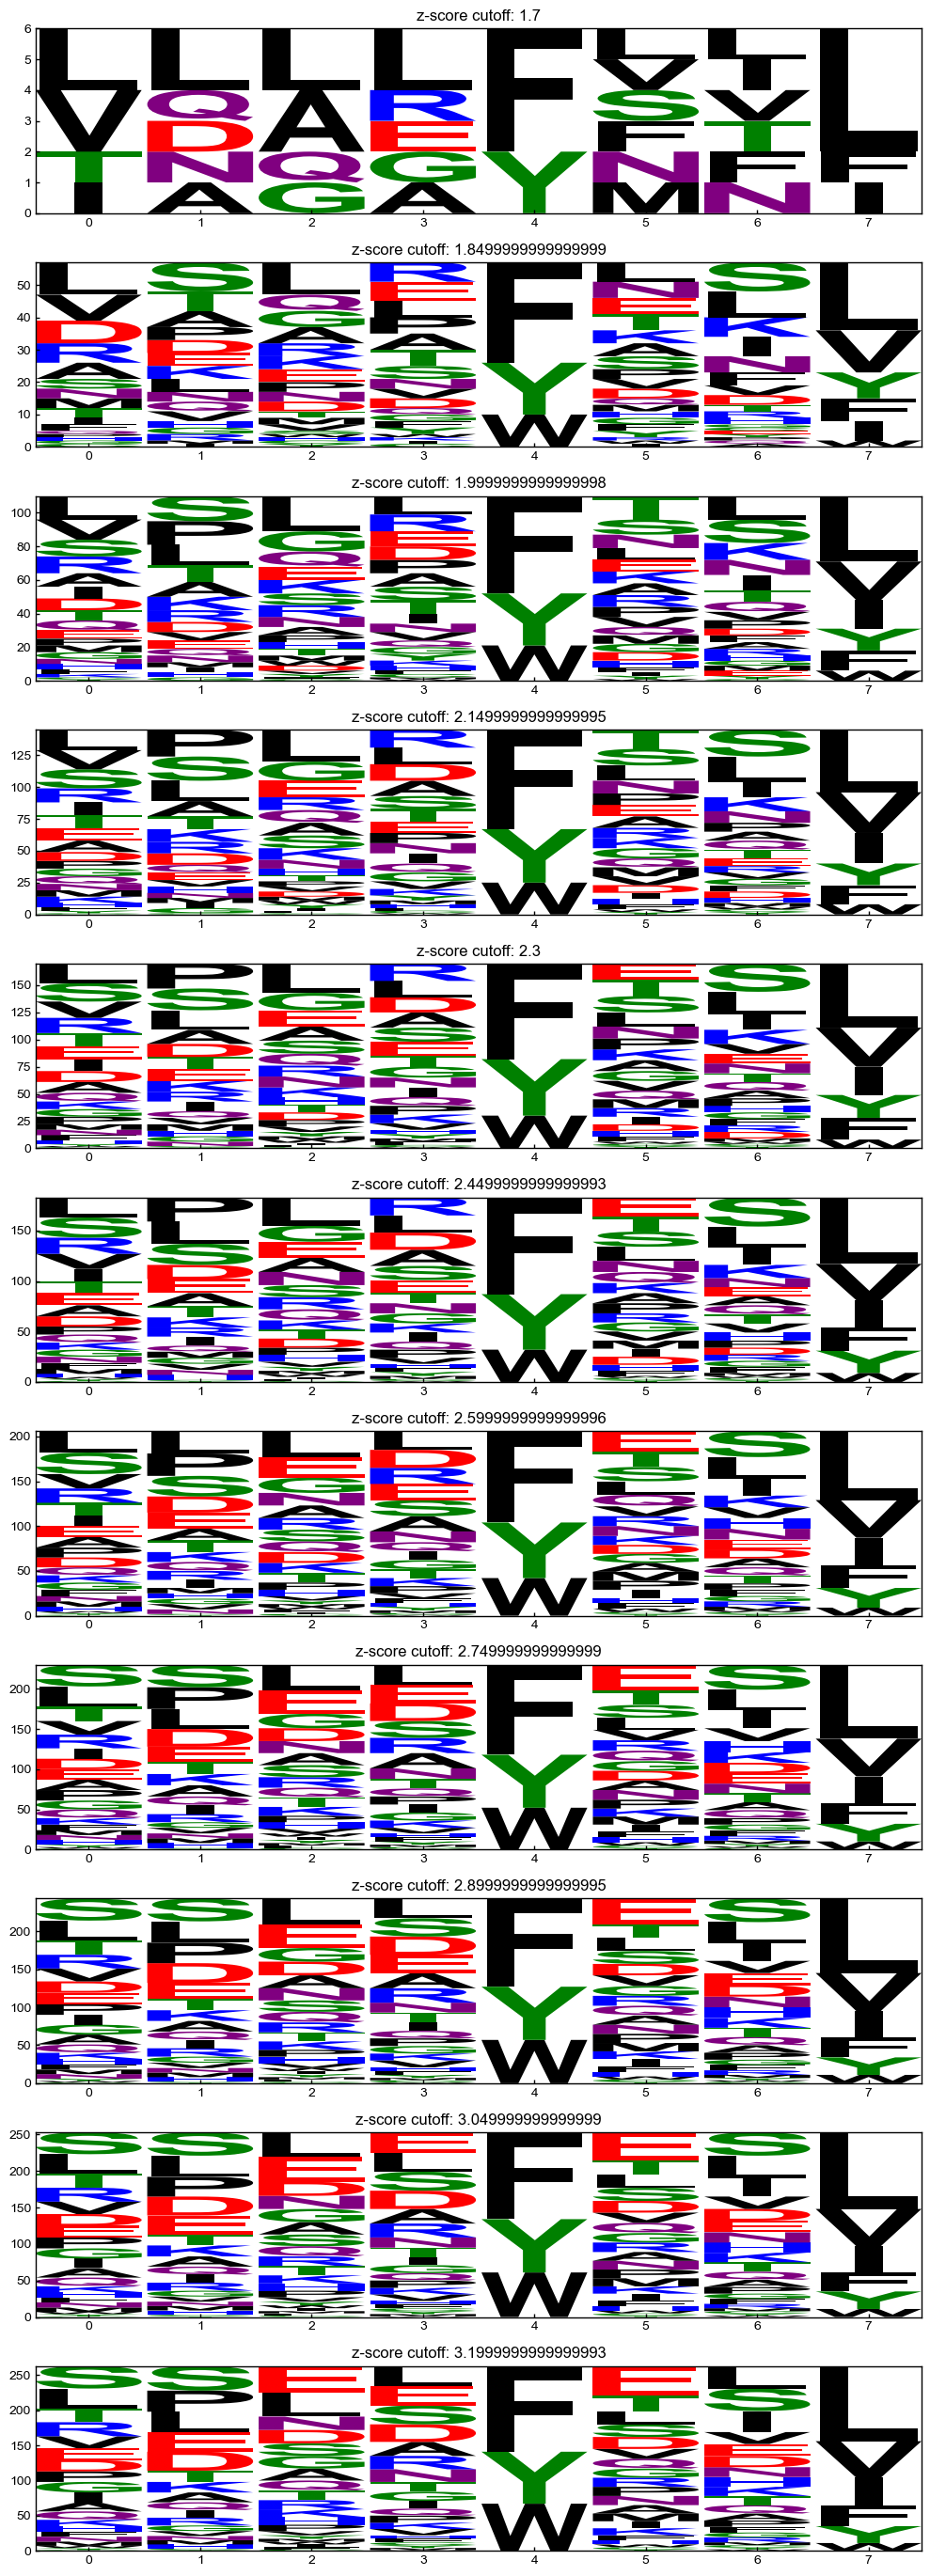

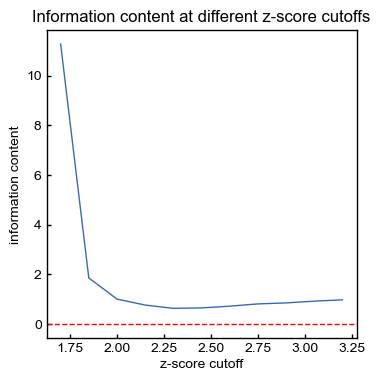

In [12]:
def information_at_z_score_cutoff_flipped(binder_df = sc_binders, background = f_nbs, z_score_cutoff=1.7, ax = None):
    binders = binder_df[binder_df['avg_z_score']<=z_score_cutoff]['first_8_residues'].to_list()
    c_binders = pssms.alignment_2_counts(binders)
    f_binders = c_binders.div(c_binders.sum(axis=1), axis=0)
    info_matrix, col_info = freq_2_information_matix(f_binders, bg=background)
    if ax is not None:
        pssms.plot_logo(c_binders, ax = ax)
        ax.set_title(f'z-score cutoff: {z_score_cutoff}');
    return np.sum(col_info), ax


cutoffs = np.arange(1.7, 3.2, 0.15)
# plot each cutoff on a subplot
n_plots = len(cutoffs)
information = []
fig, axs = plt.subplots(n_plots, 1, figsize=(10, 2.5*n_plots))
for axis, cutoff in zip(axs, cutoffs):
    I, _ = information_at_z_score_cutoff_flipped(sc_binders, f_nbs, z_score_cutoff=cutoff, ax=axis)
    information.append(I)
plt.tight_layout()
fig, ax = plt.subplots()
ax.plot(cutoffs, information)
ax.set_xlabel('z-score cutoff')
ax.set_ylabel('information content')
ax.set_title('Information content at different z-score cutoffs')
ax.axhline(y=0, color='r', linestyle='--')

<Axes: >

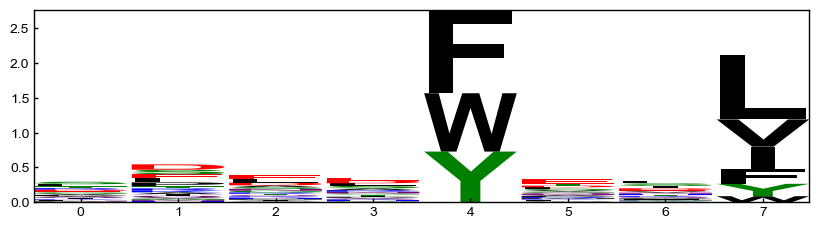

In [26]:
df, col_info = freq_2_information_matix(f_binders)
pssms.plot_logo(df)

<Axes: >

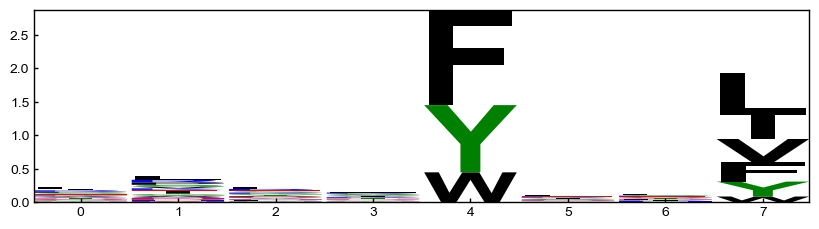

In [25]:
df, col_info = freq_2_information_matix(f_nbs)
pssms.plot_logo(df)

I think that the other residues are fucking up the information calculation. I can't understand why the 6 peptide logo above is giving such a high information content. My guess is that the other residues being set to 0 is inflating it somehow or maybe it's the fact that there are apparent preferred residues at positions compared to others. This might be where pseudocounts are helpful.

### frequencies over different z-score ranges

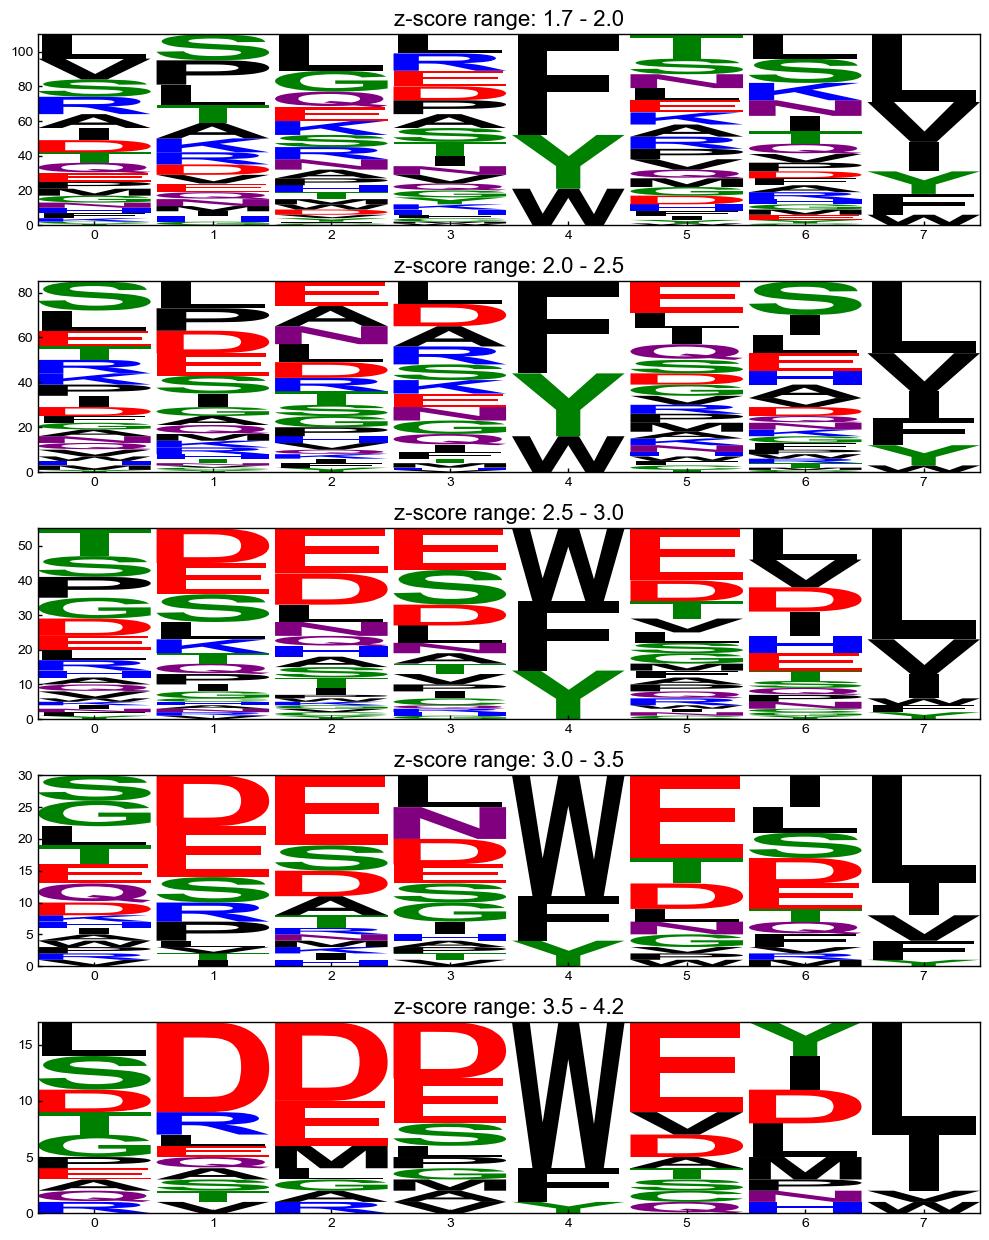

In [60]:
def plot_logo_at_z_score_range(binder_df, z_score_range, ax = None):
    binders = binder_df[(binder_df['avg_z_score']>=z_score_range[0]) & (binder_df['avg_z_score']<z_score_range[1])]['first_8_residues'].to_list()
    c_binders = pssms.alignment_2_counts(binders)
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 2.5))
    pssms.plot_logo(c_binders, ax = ax)
    ax.set_title(f'z-score range: {z_score_range[0]} - {z_score_range[1]}');
    # increase title font size
    ax.title.set_fontsize(16)
    return ax


# cutoffs = np.arange(1.7, 3.2, 0.15)
# define (start, stop) ranges spanning the z-score cutoffs
cutoffs = [(1.7, 2.0), (2.0, 2.5), (2.5, 3.0), (3.0, 3.5), (3.5, 4.2)]

# plot each cutoff on a subplot
n_plots = len(cutoffs)
information = []
fig, axs = plt.subplots(n_plots, 1, figsize=(10, 2.5*n_plots))
for axis, cutoff in zip(axs, cutoffs):
    plot_logo_at_z_score_range(sc_binders, z_score_range=cutoff, ax=axis)
plt.tight_layout()

### logomaker standard information matrix with pseudocount = 1 and flat background

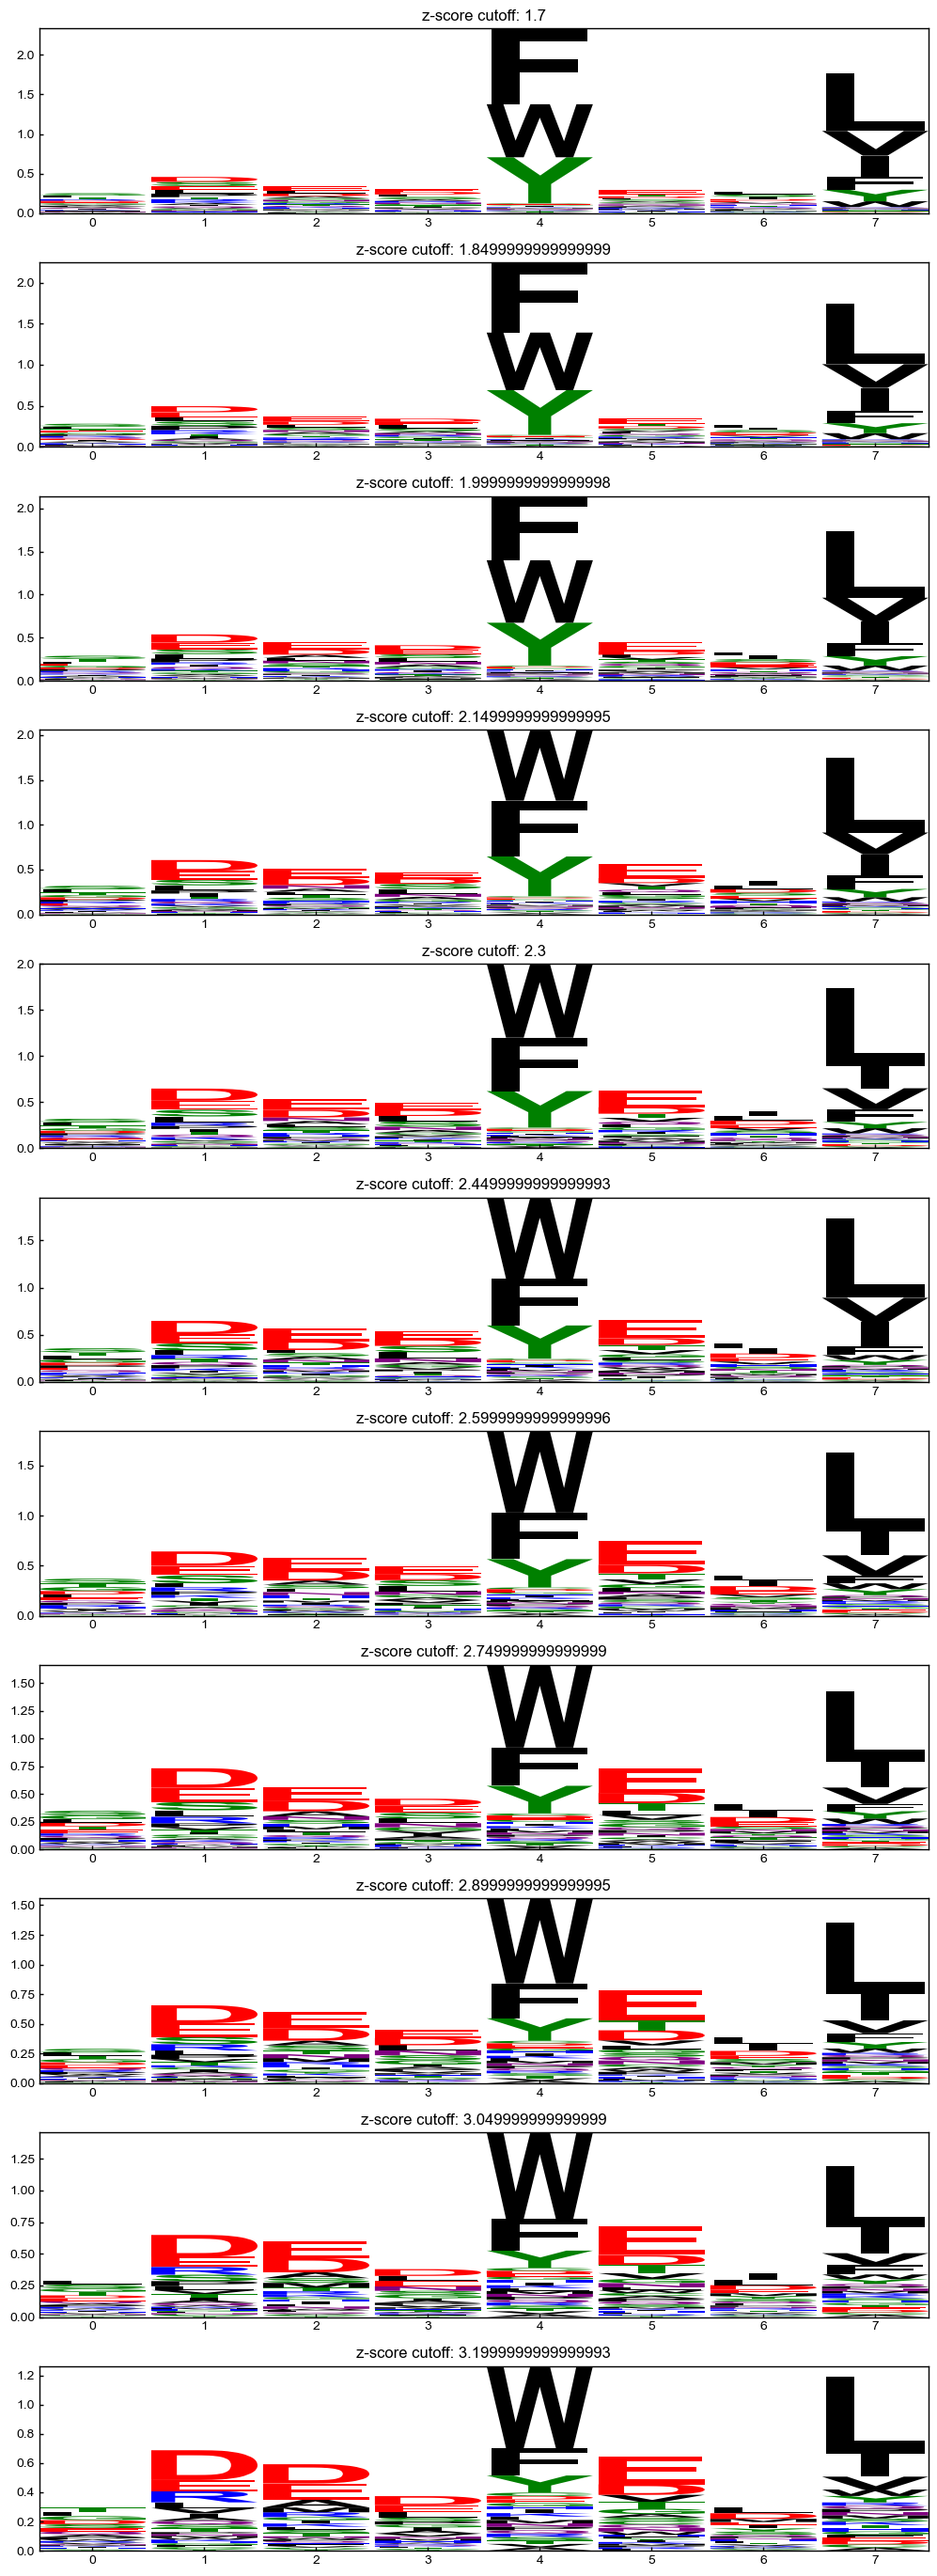

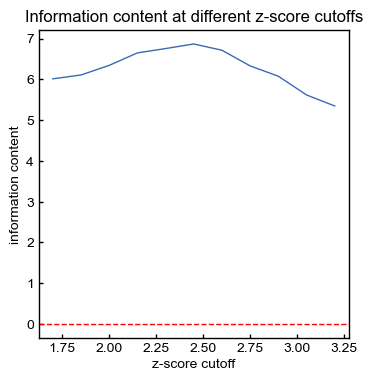

In [39]:
def information_at_z_score_cutoff_logomaker_default(binder_df = sc_binders, z_score_cutoff=1.7, ax = None):
    binders = binder_df[binder_df['avg_z_score']>=z_score_cutoff]['first_8_residues'].to_list()
    i_mat = lm.alignment_to_matrix(binders, to_type='information', pseudocount=1)
    if ax is not None:
        pssms.plot_logo(i_mat, ax = ax)
        ax.set_title(f'z-score cutoff: {z_score_cutoff}');
    return i_mat.sum(axis=1).sum()

cutoffs = np.arange(1.7, 3.2, 0.15)
n_plots = len(cutoffs)
information = []
fig, axs = plt.subplots(n_plots, 1, figsize=(10, 2.5*n_plots))
for axis, cutoff in zip(axs, cutoffs):
    I = information_at_z_score_cutoff_logomaker_default(sc_binders, z_score_cutoff=cutoff, ax=axis)
    information.append(I)
plt.tight_layout()
fig, ax = plt.subplots()
ax.plot(cutoffs, information)
ax.set_xlabel('z-score cutoff')
ax.set_ylabel('information content')
ax.set_title('Information content at different z-score cutoffs')
ax.axhline(y=0, color='r', linestyle='--')

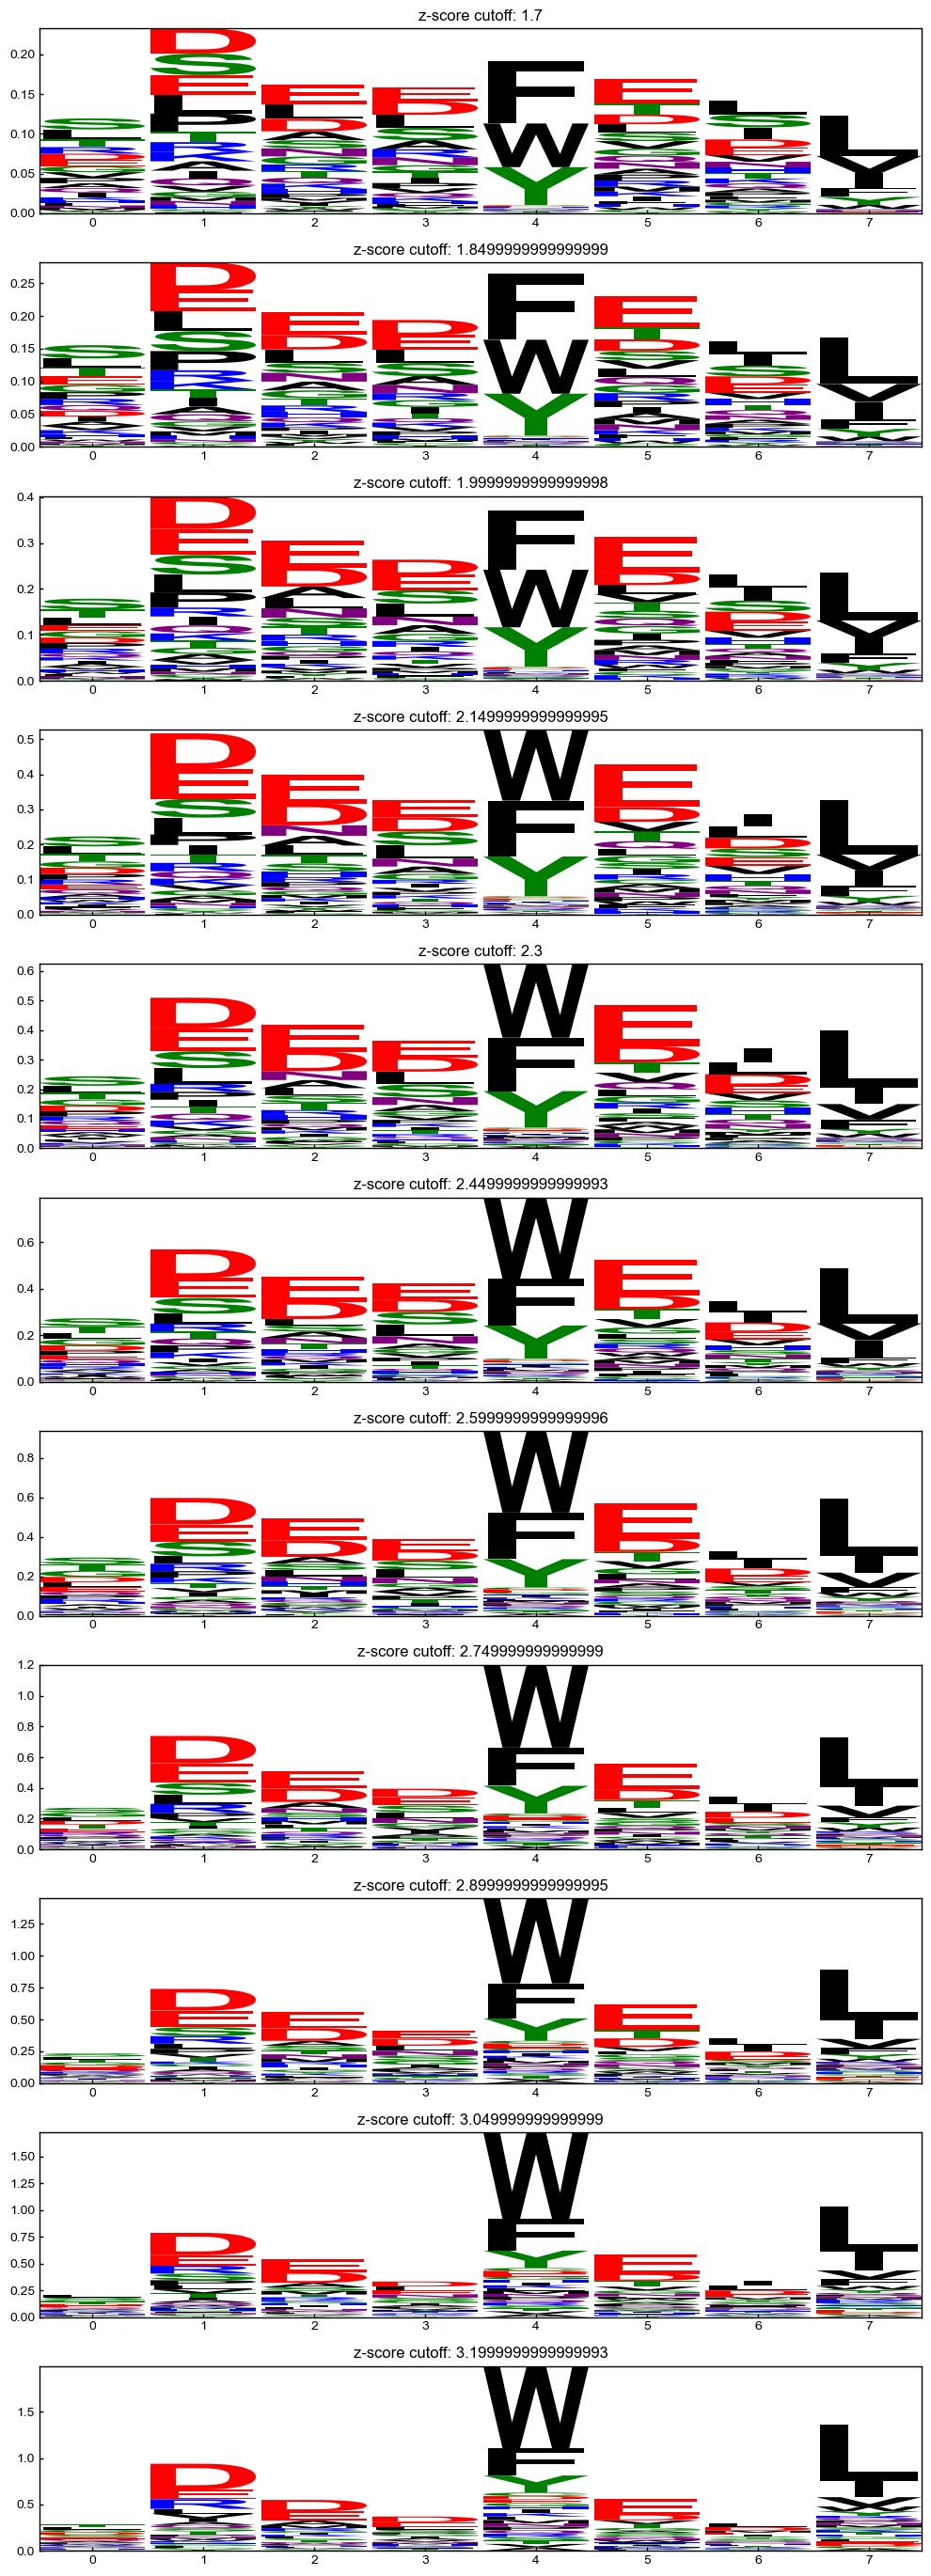

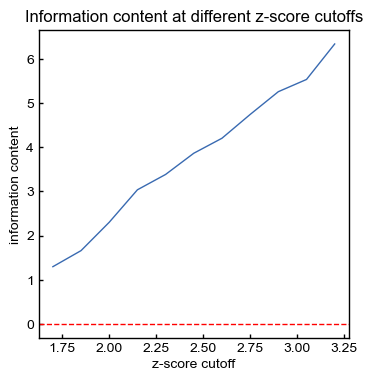

In [42]:
def information_at_z_score_cutoff_logomaker_default(binder_df = sc_binders, z_score_cutoff=1.7, background=None, ax = None):
    binders = binder_df[binder_df['avg_z_score']>=z_score_cutoff]['first_8_residues'].to_list()
    i_mat = lm.alignment_to_matrix(binders, to_type='information', pseudocount=1, background=background)
    if ax is not None:
        pssms.plot_logo(i_mat, ax = ax)
        ax.set_title(f'z-score cutoff: {z_score_cutoff}');
    return i_mat.sum(axis=1).sum()


nonbinders = sc_nbs['first_8_residues'].to_list()
temp_bg = lm.alignment_to_matrix(nonbinders, to_type='probability', pseudocount=1)

cutoffs = np.arange(1.7, 3.2, 0.15)
n_plots = len(cutoffs)
information = []
fig, axs = plt.subplots(n_plots, 1, figsize=(10, 2.5*n_plots))
for axis, cutoff in zip(axs, cutoffs):
    I = information_at_z_score_cutoff_logomaker_default(sc_binders, z_score_cutoff=cutoff, ax=axis, background=temp_bg)
    information.append(I)
plt.tight_layout()
fig, ax = plt.subplots()
ax.plot(cutoffs, information)
ax.set_xlabel('z-score cutoff')
ax.set_ylabel('information content')
ax.set_title('Information content at different z-score cutoffs')
ax.axhline(y=0, color='r', linestyle='--')

### more strictly defined binders?

In [19]:
import lir_proteome_screen_pssm.sequence_utils as seqtools

df = pd.read_csv(env.RAWFILEPATHS.full_screening_table, sep='\t')


def get_regex_matches(s: pd.Series, regex: str):
    matches = list(seqtools.get_regex_matches(regex, s["ID"]))
    # if len(matches) == 0:
    #     return
    return matches


df["regex_matches"] = df.apply(get_regex_matches, axis=1, regex="....[FWY]..[LVIWFY]")
df["num_regex_matches"] = df["regex_matches"].apply(lambda x: len(x))
df["num_regex_matches"].value_counts()
df_multi = df[df["num_regex_matches"] > 1].copy()
df_multi = df_multi.explode("regex_matches")
df_single = df[df["num_regex_matches"] == 1].copy()
df_single["regex_matches"] = df_single["regex_matches"].apply(lambda x: x[0])
df = pd.concat([df_multi, df_single])
df[["8mer", "8mer_start", "8mer_end"]] = pd.DataFrame(
    df["regex_matches"].tolist(), index=df.index
)

272107
272107


<Axes: >

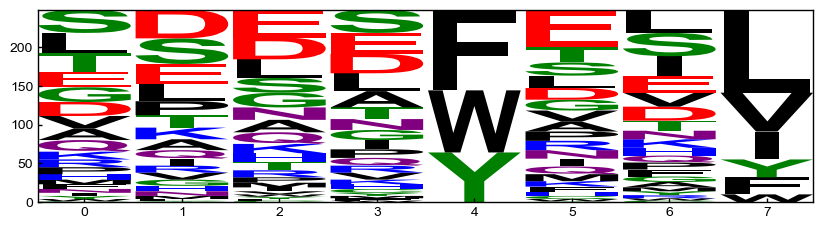

In [21]:
print(len(df))
df = df[df['Input Count'] >=10].copy()
print(len(df))
df=df.reset_index(drop=True)
pssms.plot_logo(pssms.alignment_2_counts(df[df['avg_z_score']>=1.7]['8mer'].unique()))

It looks a little different than the set of binders that jen defined. in other words when I import the `liradj_peptides_250411.csv` file, I get a different set of binders than when I import the `231209_completedata_JK.csv`

# input library

In [2]:
import lir_proteome_screen_pssm.sequence_utils as seqtools

df = pd.read_csv(env.RAWFILEPATHS.full_screening_table, sep='\t')


def get_regex_matches(s: pd.Series, regex: str):
    matches = list(seqtools.get_regex_matches(regex, s["ID"]))
    # if len(matches) == 0:
    #     return
    return matches


df["regex_matches"] = df.apply(get_regex_matches, axis=1, regex="....[FWY]..[LVIWFMY]")
df["num_regex_matches"] = df["regex_matches"].apply(lambda x: len(x))
df["num_regex_matches"].value_counts()
df_multi = df[df["num_regex_matches"] > 1].copy()
df_multi = df_multi.explode("regex_matches")
df_single = df[df["num_regex_matches"] == 1].copy()
df_single["regex_matches"] = df_single["regex_matches"].apply(lambda x: x[0])
df = pd.concat([df_multi, df_single])
df[["8mer", "8mer_start", "8mer_end"]] = pd.DataFrame(
    df["regex_matches"].tolist(), index=df.index
)

548285
289418
68267


<Axes: >

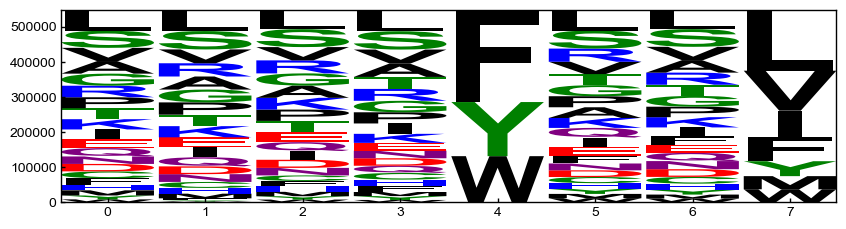

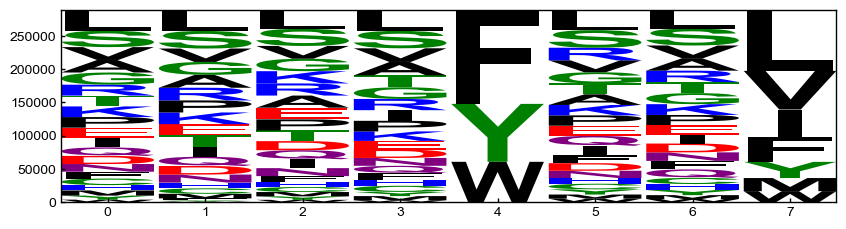

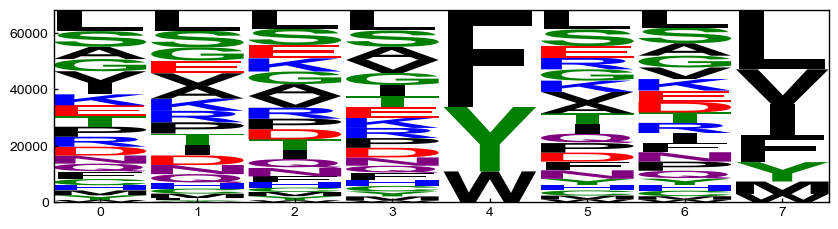

In [ ]:
print(len(df))
pssms.plot_logo(lm.alignment_to_matrix(df['8mer'].to_list(), to_type='counts'))
df = df[df['Input Count'] >=10]
print(len(df))
pssms.plot_logo(lm.alignment_to_matrix(df['8mer'].to_list(), to_type='counts'))
df = df[df['Input Count'] >=100]
print(len(df))
pssms.plot_logo(lm.alignment_to_matrix(df['8mer'].to_list(), to_type='counts'))

In [49]:
print(len(df))
df = df[df['Input Count'] >=100]
print(len(df))

519748
63636


<Axes: >

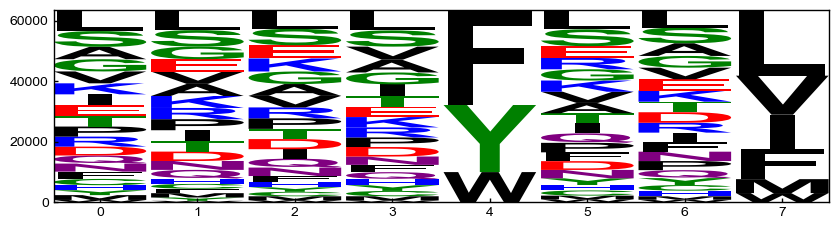

In [51]:
pssms.plot_logo(lm.alignment_to_matrix(df['8mer'].to_list(), to_type='counts'))

# ilir 

In [3]:
df = pd.read_csv(env.RAWFILEPATHS.ilir_table)
df

UNIPROT ID UNIPROT ACC Sequence     Position Verified cLIR xLIR  \
0                  NaN      O75143   DDFVMI    442‚Äì447      Yes  Yes  Yes   
1           Atg1_YEAST      P53104   REYVVV    427‚Äì432      Yes   No  Yes   
2          Atg32_YEAST      P40458   GSWQAI      84‚Äì89      Yes   No  Yes   
3   ATG4B_HUMAN** [MM]      Q9Y4P1   LTYDTL       6‚Äì11      Yes   No  Yes   
4          Atg19_YEAST      P35193   LTWEEL    410‚Äì415      Yes   No  Yes   
5           Atg3_YEAST      P40344   GDWEDL    268‚Äì273      Yes   No  Yes   
6          BNI3L_HUMAN      O60238   SSWVEL      34‚Äì39      Yes   No  Yes   
7                  NaN      P27797   DDWDFL    198‚Äì203      Yes  Yes  Yes   
8                  NaN      P22681   FGWLSL    800‚Äì805      Yes   No  Yes   
9          FUND1_HUMAN      Q8IVP5   DSYEVL      16‚Äì21      Yes  Yes  Yes   
10          OPTN_HUMAN      Q96CV9   DSFVEI    176‚Äì181      Yes  Yes  Yes   
11                 NaN      Q8MQJ7   DDFVLV    389‚Äì394      Yes  Yes  Yes   
12                 NaN      Q9SB64   SEWDPI    659‚Äì664      Yes   No  Yes   
13         RBCC1_HUMAN      Q8TDY2   FDFETI    700‚Äì705      Yes   No  Yes   
14  SQSTM_HUMAN** [LL]      Q13501   DDWTHL    336‚Äì341      Yes   No  Yes   
15  STBD1_HUMAN** [LN]      O95210   EEWEMV    201‚Äì206      Yes  Yes  Yes   
16         T53I1_HUMAN      Q96A56   DEWILV      29‚Äì34      Yes  Yes  Yes   
17                 NaN      Q3MII6   EDWDII    134‚Äì139      Yes  Yes  Yes   
18         TBCD5_HUMAN      Q92609   KEWEEL      57‚Äì62      Yes   No  Yes   
19                 NaN      Q92609   SGFTIV    785‚Äì790      Yes   No  Yes   
20         T53I2_HUMAN      Q8IXH6   DGWLII      33‚Äì38      Yes   No  Yes   
21          ULK1_HUMAN      O75385   DDFVMV    355‚Äì360      Yes  Yes  Yes   
22          ULK2_HUMAN      Q8IYT8   DDFVLV    351‚Äì356      Yes  Yes  Yes   
23          CLH1_HUMAN      Q00610   PDWIFL    512‚Äì517      Yes   No  Yes   
24          DVL2_HUMAN      O14641   RMWLKI    442‚Äì447      Yes   No  Yes   
25                 NaN      Q9BQS8   AVFDII  1278‚Äì1283      Yes   No  Yes   
26                 NaN      Q14596   EDYIII    730‚Äì735      Yes  Yes  Yes   

   Anchor PSSM score (e-value)      Species  
0     Yes         20 (8.4e-03)        Human  
1     Yes         14 (5.7e-02)        Yeast  
2     Yes         17 (2.2e-02)        Yeast  
3      No         12 (1.1e-01)        Human  
4      No         18 (1.6e-02)        Yeast  
5      No         22 (4.4e-03)        Yeast  
6     Yes         20 (8.4e-03)        Human  
7     Yes         26 (1.2e-03)        Human  
8     Yes         18 (1.6e-02)        Human  
9      No         16 (3.0e-02)        Human  
10    Yes         15 (4.2e-02)        Human  
11    Yes         17 (2.2e-02)   Drosophila  
12     No         20 (8.4e-03)  Arabidopsis  
13    Yes         17 (2.2e-02)        Human  
14    Yes         24 (2.3e-03)        Human  
15     No         21 (6.1e-03)        Human  
16    Yes         20 (8.4e-03)        Human  
17     No         24 (2.3e-03)        Human  
18     No         20 (8.4e-03)        Human  
19    Yes         11 (1.5e-01)        Human  
20    Yes         21 (6.1e-03)        Human  
21    Yes         19 (1.2e-02)        Human  
22    Yes         17 (2.2e-02)        Human  
23     No         22 (4.4e-03)        Human  
24     No         18 (1.6e-02)        Human  
25    Yes          8 (3.9e-01)        Human  
26    Yes         17 (2.2e-02)        Human

<Axes: >

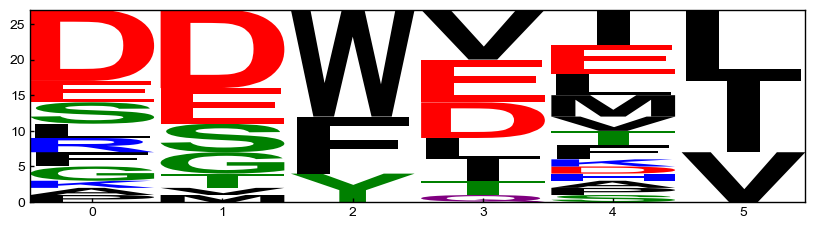

In [35]:
pssms.plot_logo(pssms.alignment_2_counts(df['Sequence'].to_list()))

# Lir central test set

In [39]:
df = pd.read_csv(env.RAWFILEPATHS.lir_central_table)
df['8mer'] = df['Combined'].str[-8:]
df

Species_x UNIPROT ACC_x      UNIPROT ID_x  \
0    Homo sapiens    A0A3Q9JIX6  A0A3Q9JIX6_HUMAN   
1    Homo sapiens        B9EIS5      B9EIS5_HUMAN   
2    Homo sapiens        O15040       TCPR2_HUMAN   
3    Homo sapiens        O15111        IKKA_HUMAN   
4    Homo sapiens        O15111        IKKA_HUMAN   
..            ...           ...               ...   
131           NaN           NaN               NaN   
132           NaN           NaN               NaN   
133           NaN           NaN               NaN   
134           NaN           NaN               NaN   
135           NaN           NaN               NaN   

                                          Protein name Motif type   Up-stream  \
0                 E2F transcription factor 3 isoform d      Y LIR  FLLWPPQPTS   
1                                         PCM1 protein      F LIR  NISQKSDEED   
2    Tectonin beta-propeller repeat-containing prot...      W LIR  MPHPEDLEDE   
3    Inhibitor of nuclear factor kappa-B kinase sub...      W LIR  EQGNSMMNLD   
4    Inhibitor of nuclear factor kappa-B kinase sub...      W LIR  FMQGKRQKEI   
..                                                 ...        ...         ...   
131                                                NaN        NaN         NaN   
132                                                NaN        NaN         NaN   
133                                                NaN        NaN         NaN   
134                                                NaN        NaN         NaN   
135                                                NaN        NaN         NaN   

    Motif Down-stream  Start position  End position  iLIR pred_6mer  \
0    YSRL     RTKFLPT           160.0         163.0             NaN   
1    FVKV  EDLPLKLTIY          1955.0        1958.0             NaN   
2    WEVI         NaN          1408.0        1411.0             NaN   
3    WSWL          TE           740.0         743.0             NaN   
4    WHLL  KIACTQSSAR           651.0         654.0             NaN   
..    ...         ...             ...           ...             ...   
131   NaN         NaN             NaN           NaN             NaN   
132   NaN         NaN             NaN           NaN             NaN   
133   NaN         NaN             NaN           NaN             NaN   
134   NaN         NaN             NaN           NaN             NaN   
135   NaN         NaN             NaN           NaN             NaN   

    ExperimentallyVerified(FunctionalYES/NO)              Combined  \
0                                        YES        FLLWPPQPTSYSRL   
1                                        YES        NISQKSDEEDFVKV   
2                                        YES        MPHPEDLEDEWEVI   
3                                        YES        EQGNSMMNLDWSWL   
4                                        YES        FMQGKRQKEIWHLL   
..                                       ...                   ...   
131                                      NaN        IWYWSDEFGSWQEY   
132                                      NaN    NRVTVYEYDTREDQWINI   
133                                      NaN  NIATVQTSQGLADKVYFLPI   
134                                      NaN            IPLRPQFFIV   
135                                      NaN            EEQRLIYEEL   

    first_6_residues  True label      8mer  
0             TSYSRL           1  QPTSYSRL  
1             EDFVKV           1  DEEDFVKV  
2             DEWEVI           1  LEDEWEVI  
3             LDWSWL           1  MNLDWSWL  
4             EIWHLL           1  QKEIWHLL  
..               ...         ...       ...  
131           GSWQEY           0  EFGSWQEY  
132           DQWINI           0  REDQWINI  
133           VYFLPI           0  DKVYFLPI  
134           PQFFIV           0  LRPQFFIV  
135           LIYEEL           0  QRLIYEEL  

[136 rows x 16 columns]

In [40]:
df['True label'].value_counts()

True label
1    80
0    56
Name: count, dtype: int64

Text(0.5, 1.0, 'test set nonbinders')

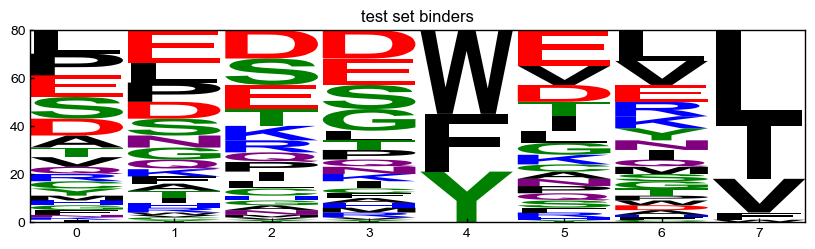

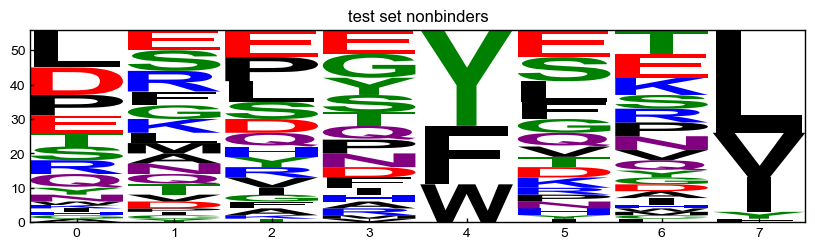

In [42]:
TP = df[df['True label'] == 1].copy()
TN = df[df['True label'] == 0].copy()
ax = pssms.plot_logo(pssms.alignment_2_counts(TP['8mer'].to_list()))
ax.set_title('test set binders')
ax = pssms.plot_logo(pssms.alignment_2_counts(TN['8mer'].to_list()))
ax.set_title('test set nonbinders')

# junk

<Axes: xlabel='position'>

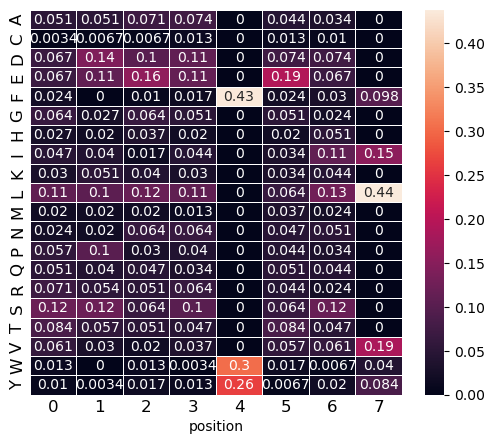

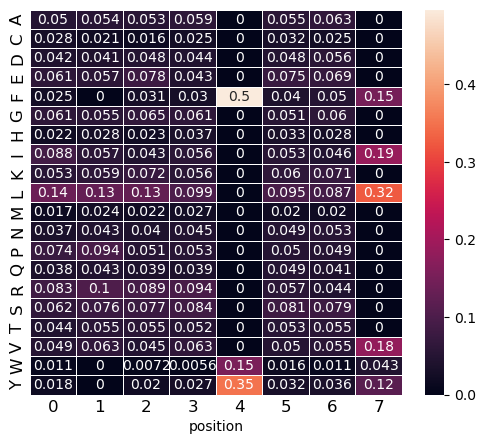

In [166]:
pssms.plot_logo_as_heatmap(f_binders)
pssms.plot_logo_as_heatmap(f_nbs)

<Axes: >

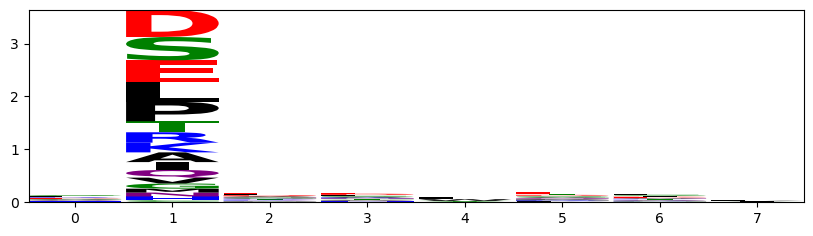

In [ ]:
pssms.plot_logo(lm.transform_matrix(f_binders, from_type='probability', to_type='information', background=f_nbs))
pssms.plot_logo(lm.transform_matrix(f_binders, from_type='probability', to_type='information'))
pssms.plot_logo(lm.alignment_to_matrix(binders, to_type='information', background=f_nbs, pseudocount=0))

In [121]:
assert all(f_binders.columns == f_nbs.columns)
assert all(f_binders.index == f_nbs.index)

<Axes: >

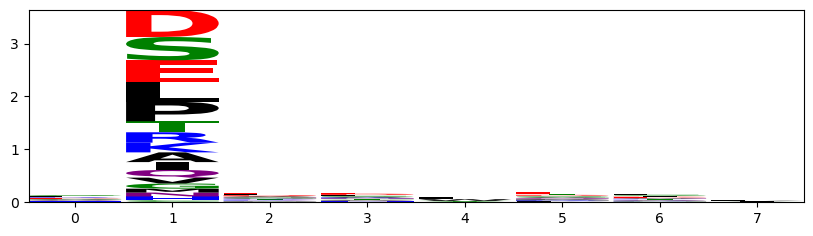

In [148]:
df = f_binders.copy()
fg_vals = f_binders.values
bg_vals = f_nbs.values
temp = fg_vals * (np.log2(fg_vals + np.finfo(float).tiny) - np.log2(bg_vals + np.finfo(float).tiny))
col_info = temp.sum(axis=1)
# temp[:, np.newaxis] * np.ones([8, 8])
col_info[:, np.newaxis] * fg_vals
df.loc[:, :] = col_info[:, np.newaxis] * fg_vals
pssms.plot_logo(df)

In [164]:
col_info

array([0.13500846, 3.63895431, 0.18268189, 0.18232227, 0.10247343,
       0.19366982, 0.1629876 , 0.05107739])

In [177]:
t=0
for i,y in zip(f_binders.loc[1,:], f_nbs.loc[1,:]):
    try:
        t += i*np.log2(i/y)
        print(f"{i:.2g}, {y:.2g}, {i*np.log2(i/y):.2g}, {t:.2g}")
    except ZeroDivisionError:
        print(i, y, 'divide by zero')

0.051, 0.054, -0.0047, -0.0047
0.0067, 0.021, -0.011, -0.016
0.14, 0.041, 0.25, 0.24
0.11, 0.057, 0.11, 0.34
0.0 0.0 divide by zero
0.027, 0.055, -0.028, 0.31
0.02, 0.028, -0.0094, 0.31
0.04, 0.057, -0.021, 0.28
0.051, 0.059, -0.012, 0.27
0.1, 0.13, -0.031, 0.24
0.02, 0.024, -0.0045, 0.24
0.02, 0.043, -0.022, 0.21
0.1, 0.094, 0.011, 0.23
0.04, 0.043, -0.0043, 0.22
0.054, 0.1, -0.049, 0.17
0.12, 0.076, 0.081, 0.25
0.057, 0.055, 0.0038, 0.26
0.03, 0.063, -0.032, 0.23
0.0 0.0 divide by zero
0.003367003367003367 0.0 divide by zero


In [179]:
for i in binders:
    print(i)

DDDDWEDI
QDDMWEHI
GDGSWALL
ADDEWCYV
RDLGWDIL
LREDWDML
GEEEFELL
EAMEWVII
SDDDWEYL
PVRPFSNW
SDDDWEYL
DDDDWEDI
STAAYQPI
LRDVWEIL
TQEEWTLL
TSELFEDL
LLMSWVML
SDADWDDL
WDDLWTSL
VEKAFTDL
TRDIYELV
PLRPYDSY
TDAVWGLL
TEAEWEDL
QDEGWETL
EEEIWEEL
ARTLFNQV
GIINWVVL
EDDHFWEL
LREDWDML
GEEEFELL
QVDSWEEI
DDSLYEFL
DDEDWGSL
KDSGFTIV
LESGYPFI
SSENWEII
HPHNFNRF
EETLFEEF
IPMTWTLL
GTELWDQF
LPNSWLIL
RSENWEII
SSENWEII
SESDWETL
QEESWLSV
GSEEWEDL
DKHCFECY
ECYGYDII
NSNNFQIL
RETEYSLL
PEDEYELL
WEEEWTLL
TLNSFTVL
LLDSYDLL
DLLSYDDL
EDLTWLEW
GRPIYPNV
HSHAFIDL
RDAVFDII
PSASYLEV
SENDFGNY
SDDEWEEL
GGQLFSPL
TEEDWETI
DDEVWVQV
ELQCWMLL
STIEYEHL
HDDLWEQL
VDDRFETL
TSELFEDL
GSLEWDIL
QPNTFPTV
EADPYEII
IIESFNVV
AKEVFVVL
DSVAFEDV
TQEEWALL
TSLNWVYL
GDILWEHL
RISDWGEL
LPEAWGLL
SKGLFAPL
YGEEWCVI
SKAHYFGV
GVHSFRSL
TESEFTEF
DNWPYDDW
QTLDWEIV
PSTSWRSL
PDDTFEVL
TTKSWEII
TQEEWTLL
KDEDFLDL
FLDSWVHI
PEDEYELL
SETQFSHL
GDCEWFVV
VPEDYWVF
AQQSYQHV
LHSIFMDL
PEENWTVL
HQDLYDDF
DDFEWVHV
LTKDFEEL
LRPLYMNL
PLRFFQNV
SSTLFWAI
SSGQWIIL
LELAWDML
HDESWGFI
S

In [ ]:
for i in nonbinders:
    print(i)

RECDWWSV
PLRHFLDV
ADGNWMGI
NNENYIEV
CPLIWCLL
REAGYDAY
DLEGYAFI
MSAQFRSL
EKQRFEKL
CGKAFINY
LRTAFNRV
VPSKWQTY
RAGKYDVY
RKAKYILL
AGCTWKRW
NVKDFADW
FNKPFVFL
LQPIYQQI
HKMHYPMV
FRLSYPWV
VGHDYQWI
IPLRYADF
SGDCFLLL
RTAAYQSV
RTGEYSHW
SLVQFLFI
EQRIYLGV
ERVVFEAI
DTEFWFSV
AERSYHIF
EDYPYGPV
ELWKWKEL
AENEFVTL
LAAEYPAV
IDDAFDEL
TNVTWLQL
SALKYAGL
LLFGYDWV
GLSYFFDF
WLSSFQKV
LKLKFGLI
TSQAYNAL
PSISYAAL
IGFCYDYL
ELKDFNII
GAELWKRF
EPAPWSAL
ASGGYVNI
YHEDWCDL
VKLIYYYL
GVLLYTML
LIRLFLEL
RLMAFGCV
IPLRYLDV
GLGLFLLV
WKKKYVTL
RARIWSYL
DTACWMAW
ATNLFFYV
REAPFNLV
RAAAFTLF
EPKLFGGF
ITQEYDAI
TLSPWSFL
AEKPWWQV
HIDYFEEI
RTAVFMKY
RAAVFWNV
VNRFFDSL
AVGVFIIL
EKFVFDVF
QAEEWLKV
LRTAWNLY
LREAYIYV
KKTNFPVI
LRTAYMVL
QCSAYNDV
RPNLYEKL
GKRSFSVY
SSINFLMV
CTKVYKDL
EKAQYVLL
SCMFFEPL
RDFVYKIF
KKSCYPRW
RPETYIQY
GTTVFEDL
INSDYETY
GSFLFHAI
TIRQWFEY
VKELFQEL
RASNFARW
DSDLWMDY
ELPVYVGI
NGRPYSLL
HGPGFARL
CNREFTYI
PLRCFCPW
LRAFFHNL
KHTAFATF
GVSAFGQV
PGSWFSEF
IILYFTKV
RARIYHMV
TPGLYAMV
CLPGFYRL
QRSVFIPY
RNDSFAWL
KISEWGKI
TAVKFDDI
ADAGFDVW
L

In [135]:
temp

array([0.13500846, 3.63895431, 0.18268189, 0.18232227, 0.10247343,
       0.19366982, 0.1629876 , 0.05107739])

In [137]:
fg_vals.shape

(8, 20)